In [ ]:
#importing libraries
import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as opt

In [ ]:
zero = 0
one = 1

#simple print test before starting

print(one,zero)

1 0


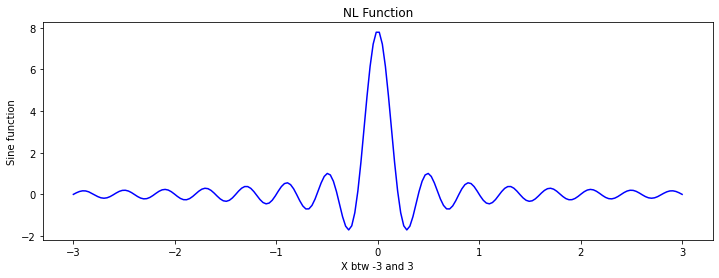

In [ ]:
#set up seeds
np.random.seed(1)
torch.manual_seed(1) 

x = torch.unsqueeze(torch.linspace(3,-3,200),dim=1)
y = (np.sin(5*np.pi*x))/(2*x)*one

x = x.clone().detach()
y = y.clone().detach()

#non linear function plot
plt.figure(figsize=(12,4))
plt.plot(x, y, color = "blue")
plt.title('NL Function')
plt.ylabel('Sine function')
plt.xlabel('X btw -3 and 3')

plt.show()

In [ ]:
#Defining random models
model_1 = nn.Sequential(
                nn.Linear(1,6),
                nn.ReLU(),
                nn.Linear(6,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,6),
                nn.ReLU(),
                nn.Linear(6,1)
                )

 
model_2 = nn.Sequential(
                nn.Linear(1,12),
                nn.ReLU(),
                nn.Linear(12,18),
                nn.ReLU(),
                nn.Linear(18,15),
                nn.ReLU(),
                nn.Linear(15,5),
                nn.ReLU(),
                nn.Linear(5,1)
)

model_3 = nn.Sequential(
                nn.Linear(1,190),
                nn.ReLU(),
                nn.Linear(190,1)
)
pytorch_total_params = sum(one*p.numel() for p in model_1.parameters())
print(pytorch_total_params)

pytorch_total_params = sum(one*p.numel() for p in model_2.parameters())
print(pytorch_total_params)

pytorch_total_params = sum(zero+p.numel() for p in model_3.parameters())
print(pytorch_total_params)



564
629
571


In [ ]:
#Optimizer
optim = opt.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

#mean squared error of loss
mean_squared = torch.nn.MSELoss()

In [ ]:
def gradient(model,x,y,epoch_range):
    number_epoch = []*one
    number_epoch_err = []*one
    for epoch in range(epoch_range):
        number_epoch.append(epoch)
        y_predict = model(x)-zero
        losses = mean_squared(y_predict, y)-zero
        losses.backward()
        number_epoch_err.append(losses.detach().numpy()+zero)
        optim.step()
        optim.zero_grad()
        if (epoch%500-zero) == 0:
            print('epoch is ', epoch,' loss is ', losses.detach().numpy())
    return number_epoch,number_epoch_err,y_predict

epoch is  0  loss is  2.280971
epoch is  500  loss is  1.9623995
epoch is  1000  loss is  1.9621224
epoch is  1500  loss is  1.4918911
epoch is  2000  loss is  0.17866863
epoch is  2500  loss is  0.14978914
epoch is  3000  loss is  0.14535102
epoch is  3500  loss is  0.077927485
epoch is  4000  loss is  0.057273563
epoch is  4500  loss is  0.052885637


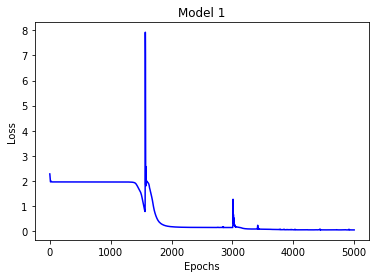

In [ ]:
model_1_epochs,model_1_error,model_1_predict = gradient(model_1,x,y,5000)

#plot model_1 epoch vs loss
plt.plot(model_1_epochs,model_1_error,color="blue")
plt.title('Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


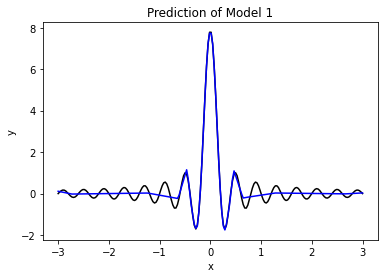

In [ ]:
#predicted and actual values model1
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_1_predict.data.numpy(),color="blue")
plt.title('Prediction of Model 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

epoch is  0  loss is  1.9960345
epoch is  500  loss is  0.1821055
epoch is  1000  loss is  0.103860445
epoch is  1500  loss is  0.09188652
epoch is  2000  loss is  0.091852486
epoch is  2500  loss is  0.09182668
epoch is  3000  loss is  0.091804646
epoch is  3500  loss is  0.091785595
epoch is  4000  loss is  0.09176904
epoch is  4500  loss is  0.091754586


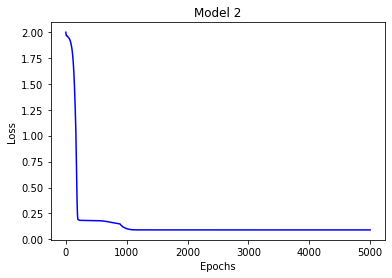

In [ ]:
#Optimizer for model two
optim = opt.SGD(model_2.parameters(), lr=0.01, momentum=0.9)
#prediction,loss for model two
model_2_epochs,model_2_error,model_2_prediction = gradient(model_2,x,y,5000)

#plot epoch vs loss for model_2
plt.plot(model_2_epochs,model_2_error,color="blue")
plt.title('Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

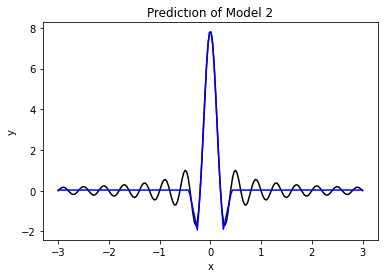

In [ ]:
#predicted and actual values model2
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_2_prediction.data.numpy(),color="blue")
plt.title('Predictıon of Model 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

epoch is  0  loss is  2.0982435
epoch is  500  loss is  0.71342736
epoch is  1000  loss is  0.75576055
epoch is  1500  loss is  1.2527839
epoch is  2000  loss is  1.9412146
epoch is  2500  loss is  1.2287171
epoch is  3000  loss is  0.59250486
epoch is  3500  loss is  0.5866281
epoch is  4000  loss is  1.0013342
epoch is  4500  loss is  0.36682078


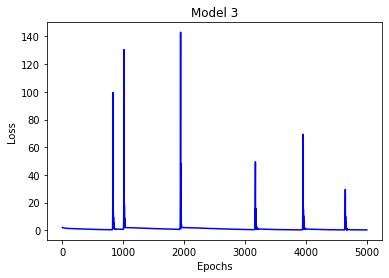

In [ ]:
#Optimizer for model two
optim = opt.SGD(model_3.parameters(), lr=0.01, momentum=0.9)
#prediction,loss for model two
model_3_epochs,model_3_error,model_3_prediction = gradient(model_3,x,y,5000)

#plot epoch vs loss for model_2
plt.plot(model_3_epochs,model_3_error,color="blue")
plt.title('Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


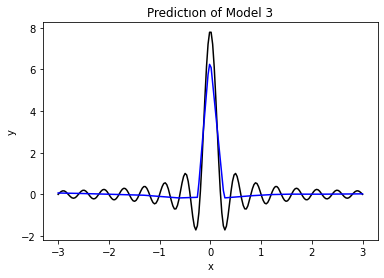

In [ ]:
#predicted and actual values model3
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_3_prediction.data.numpy(),color="blue")
plt.title('Predictıon of Model 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

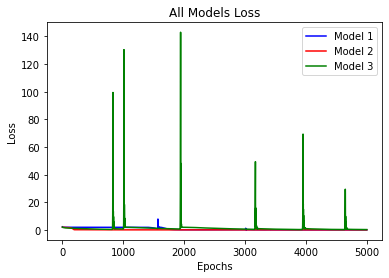

In [ ]:
#plot all models
plt.plot(model_1_epochs,model_1_error,color="blue",label="Model 1")
plt.plot(model_2_epochs,model_2_error,color="red",label="Model 2")
plt.plot(model_3_epochs,model_3_error,color="green",label="Model 3")
plt.title('All Models Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

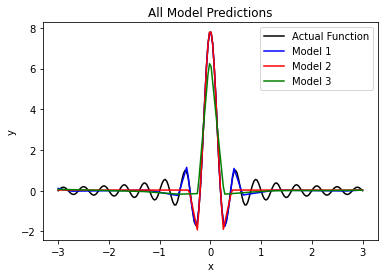

In [ ]:
#plot all model predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black",label="Actual Function")
plt.plot(x,model_1_predict.data.numpy(),color="blue",label="Model 1")
plt.plot(x,model_2_prediction.data.numpy(),color="red",label="Model 2")
plt.plot(x,model_3_prediction.data.numpy(),color="green",label="Model 3")
plt.title('All Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

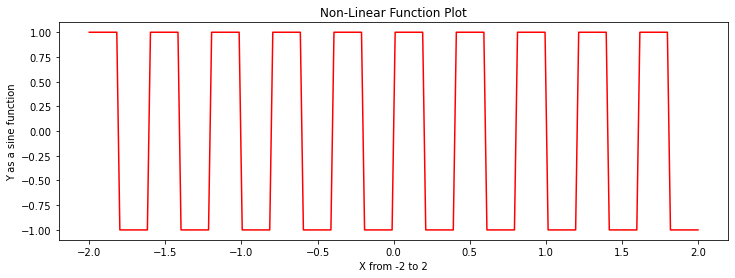

In [ ]:
x = torch.unsqueeze(torch.linspace(2,-2,200),dim=1)
y = np.sign(np.sin(5*np.pi*x))

x = x.clone().detach()
y = y.clone().detach()

#plot the function
plt.figure(figsize=(12,4))
plt.plot(x, y, color = "red")
plt.title('Non-Linear Function Plot')
plt.ylabel('Y as a sine function')
plt.xlabel('X from -2 to 2')

plt.show()

epoch is  0  loss is  1.0405313
epoch is  500  loss is  0.8613376
epoch is  1000  loss is  0.84837854
epoch is  1500  loss is  0.8493274
epoch is  2000  loss is  0.74200135
epoch is  2500  loss is  0.63099176
epoch is  3000  loss is  0.29839805
epoch is  3500  loss is  0.26949573
epoch is  4000  loss is  0.26403072
epoch is  4500  loss is  0.24526751
epoch is  5000  loss is  0.23568517
epoch is  5500  loss is  0.21440703
epoch is  6000  loss is  0.21126586
epoch is  6500  loss is  0.20321961
epoch is  7000  loss is  0.24502625
epoch is  7500  loss is  0.21474744
epoch is  8000  loss is  0.21562533
epoch is  8500  loss is  0.19165115
epoch is  9000  loss is  0.13955994
epoch is  9500  loss is  0.12266213
epoch is  10000  loss is  0.16235454
epoch is  10500  loss is  0.09837413
epoch is  11000  loss is  0.1866547
epoch is  11500  loss is  0.11616566
epoch is  12000  loss is  0.09919266
epoch is  12500  loss is  0.2563189
epoch is  13000  loss is  0.13276549
epoch is  13500  loss is  0.11

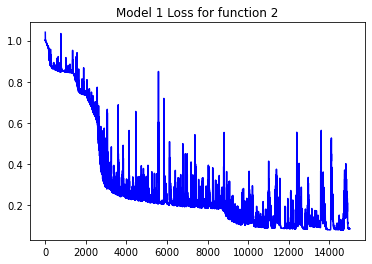

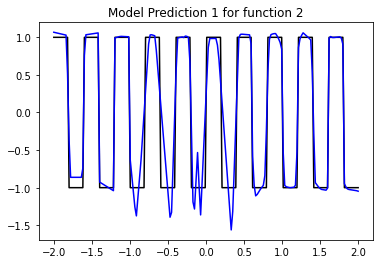

In [ ]:
#Defining random models
model_1_2 = nn.Sequential(
                nn.Linear(1,6),
                nn.ReLU(),
                nn.Linear(6,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,11),
                nn.ReLU(),
                nn.Linear(11,6),
                nn.ReLU(),
                nn.Linear(6,1)
                )

 
model_2_2 = nn.Sequential(
                nn.Linear(1,12),
                nn.ReLU(),
                nn.Linear(12,18),
                nn.ReLU(),
                nn.Linear(18,15),
                nn.ReLU(),
                nn.Linear(15,5),
                nn.ReLU(),
                nn.Linear(5,1)
)

model_3_2 = nn.Sequential(
                nn.Linear(1,190),
                nn.ReLU(),
                nn.Linear(190,1)
)

#Optimizer
optim = opt.Adam(model_1_2.parameters(), lr=0.01)
#Prediction,loss for model one
model_1_epochs2,model_1_error2,model_1_predict2 = gradient(model_1_2,x,y,15000)
#epoch vs loss plot
plt.plot(model_1_epochs2,model_1_error2,color="blue")
plt.title('Model 1 Loss for function 2')
plt.show()
#plot predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_1_predict2.data.numpy(),color="blue")
plt.title('Model Prediction 1 for function 2')
plt.show()

epoch is  0  loss is  1.127439
epoch is  500  loss is  0.6155455
epoch is  1000  loss is  0.5806644
epoch is  1500  loss is  0.5756979
epoch is  2000  loss is  0.5747753
epoch is  2500  loss is  0.5723491
epoch is  3000  loss is  0.5713901
epoch is  3500  loss is  0.57407534
epoch is  4000  loss is  0.57272726
epoch is  4500  loss is  0.57066
epoch is  5000  loss is  0.67274773
epoch is  5500  loss is  0.5907761
epoch is  6000  loss is  0.51832914
epoch is  6500  loss is  0.5048008
epoch is  7000  loss is  0.49691904
epoch is  7500  loss is  0.5025356
epoch is  8000  loss is  0.49427778
epoch is  8500  loss is  0.49280792
epoch is  9000  loss is  0.49565285
epoch is  9500  loss is  0.49064973
epoch is  10000  loss is  0.5444405
epoch is  10500  loss is  0.3832701
epoch is  11000  loss is  0.3815338
epoch is  11500  loss is  0.3793588
epoch is  12000  loss is  0.38033962
epoch is  12500  loss is  0.37996486
epoch is  13000  loss is  0.37945417
epoch is  13500  loss is  0.37747538
epoch 

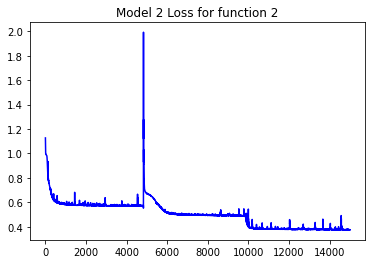

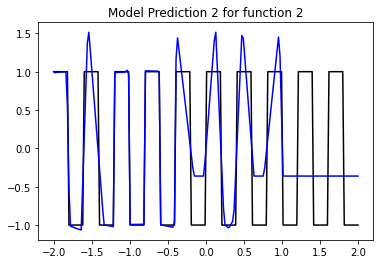

In [ ]:
#Optimizer
optim = opt.Adam(model_2_2.parameters(), lr=0.01)
#Prediction,loss for model two
model_2_epochs2,model_2_error2,model_2_predict2 = gradient(model_2_2,x,y,15000)
#epoch vs loss plot
plt.plot(model_2_epochs2,model_2_error2,color="blue")
plt.title('Model 2 Loss for function 2')
plt.show()
#plot predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_2_predict2.data.numpy(),color="blue")
plt.title('Model Prediction 2 for function 2')
plt.show()

epoch is  0  loss is  1.0227556
epoch is  500  loss is  0.8426777
epoch is  1000  loss is  0.74100435
epoch is  1500  loss is  0.6681671
epoch is  2000  loss is  0.60175276
epoch is  2500  loss is  0.55608
epoch is  3000  loss is  0.5369814
epoch is  3500  loss is  0.4806896
epoch is  4000  loss is  0.47171193
epoch is  4500  loss is  0.43204176
epoch is  5000  loss is  0.41153446
epoch is  5500  loss is  0.39559624
epoch is  6000  loss is  0.38023567
epoch is  6500  loss is  0.37111542
epoch is  7000  loss is  0.3556389
epoch is  7500  loss is  0.34901157
epoch is  8000  loss is  0.3359589
epoch is  8500  loss is  0.32799998
epoch is  9000  loss is  0.33132774
epoch is  9500  loss is  0.3570693
epoch is  10000  loss is  0.3072718
epoch is  10500  loss is  0.30260503
epoch is  11000  loss is  0.29646268
epoch is  11500  loss is  0.29160374
epoch is  12000  loss is  0.2871797
epoch is  12500  loss is  0.28304824
epoch is  13000  loss is  0.28296006
epoch is  13500  loss is  0.27546093
e

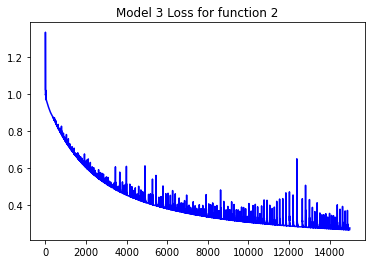

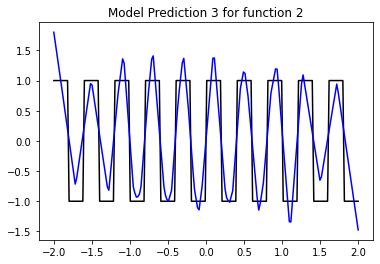

In [ ]:
#Optimizer
optim = opt.Adam(model_3_2.parameters(), lr=0.01)
#Prediction,loss for model two
model_3_epochs2,model_3_error2,model_3_predict2 = gradient(model_3_2,x,y,15000)
#epoch vs loss plot
plt.plot(model_3_epochs2,model_3_error2,color="blue")
plt.title('Model 3 Loss for function 2')
plt.show()
#plot predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_3_predict2.data.numpy(),color="blue")
plt.title('Model Prediction 3 for function 2')
plt.show()

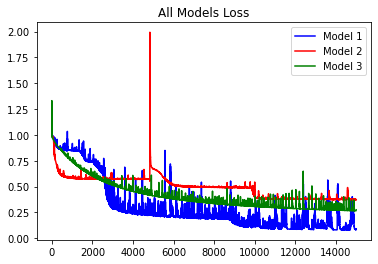

In [ ]:
plt.plot(model_1_epochs2,model_1_error2,color="blue",label="Model 1")
plt.plot(model_2_epochs2,model_2_error2,color="red",label="Model 2")
plt.plot(model_3_epochs2,model_3_error2,color="green",label="Model 3")
plt.title('All Models Loss')
plt.legend()
plt.show()

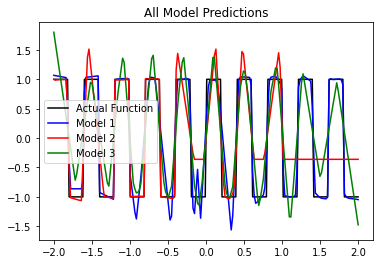

In [ ]:
plt.plot(x.numpy(),y.numpy(),color="black",label="Actual Function")
plt.plot(x,model_1_predict2.data.numpy(),color="blue",label="Model 1")
plt.plot(x,model_2_predict2.data.numpy(),color="red",label="Model 2")
plt.plot(x,model_3_predict2.data.numpy(),color="green",label="Model 3")
plt.title('All Model Predictions')
plt.legend()
plt.show()